In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from codebase import utils as ut
from codebase.models.vae import VAE
from codebase.models.gmvae import GMVAE

In [59]:
vae = VAE(nn='v1', name='model=vae_z=10_run=0000', z_dim=10)
file_path = os.path.join('checkpoints',
                             'model=vae_z=10_run=0000',
                             'model-20000.pt')
state = torch.load(file_path)
vae.load_state_dict(state)

gmvae = GMVAE(nn='v1', name='model=gmvae_z=10_k=500_run=0000', z_dim = 10)
file_path = os.path.join('checkpoints',
                             'model=gmvae_z=10_k=500_run=0000',
                             'model-20000.pt')
state = torch.load(file_path)
gmvae.load_state_dict(state)


<All keys matched successfully>

In [60]:
samples_vae = vae.sample_x(200)
samples_vae = samples_vae.detach().numpy()
samples_vae = samples_vae.reshape(200,28,28)
samples_vae = samples_vae.reshape(10,20,28,28)

img = np.zeros((280,560))

for i in range(10):
    for j in range(20):
        img[28*i:28*(i+1),28*j:28*(j+1)] = samples_vae[i][j]

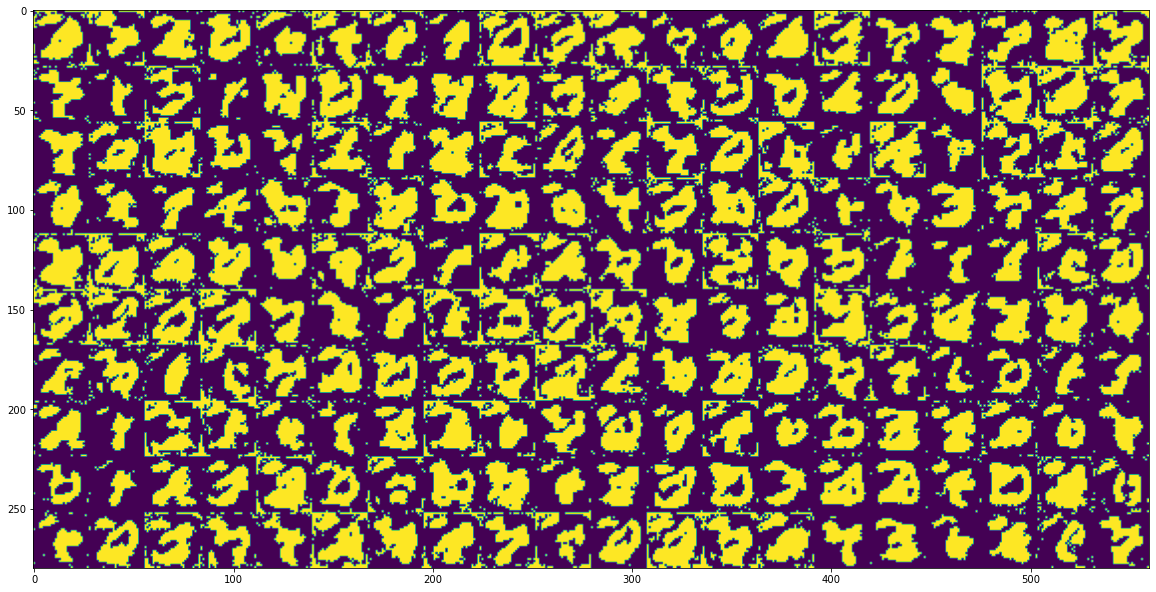

In [61]:
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.savefig('vae.png')

In [43]:
samples_gmvae = gmvae.sample_x(200)
samples_gmvae = samples_gmvae.detach().numpy()
samples_gmvae = samples_gmvae.reshape(200,28,28)
samples_gmvae = samples_gmvae.reshape(10,20,28,28)

img_gmvae = np.zeros((280,560))

for i in range(10):
    for j in range(20):
        img_gmvae[28*i:28*(i+1),28*j:28*(j+1)] = samples_gmvae[i][j]

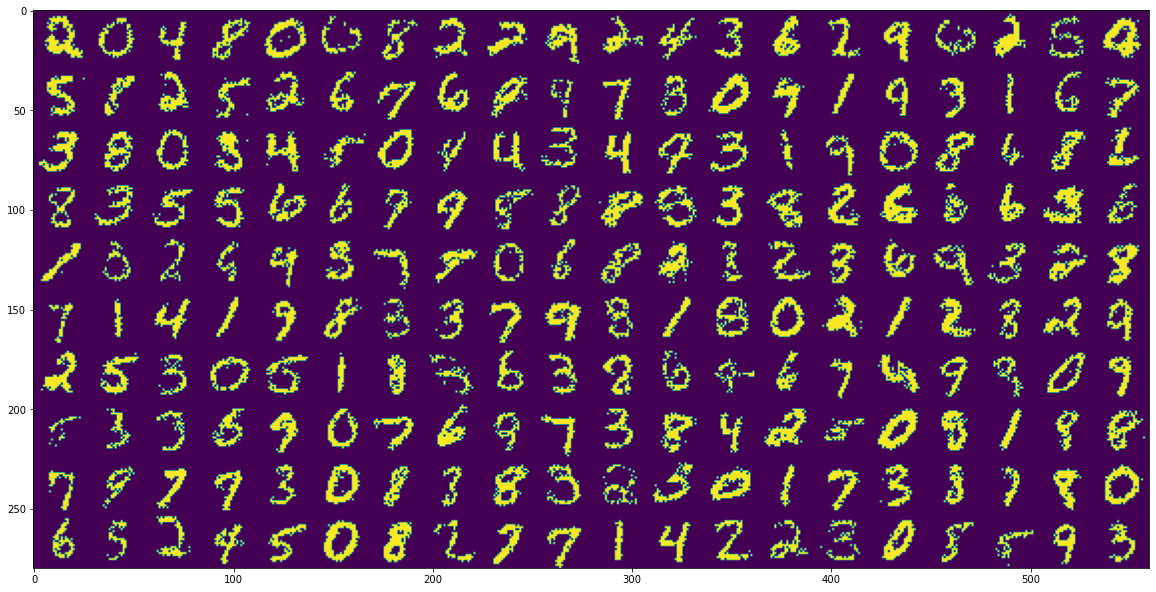

In [18]:
#GMVAE
plt.figure(figsize=(20,20))
plt.imshow(img_gmvae)
plt.savefig('gmvae.png')